2010
2010
2010
2010
2010


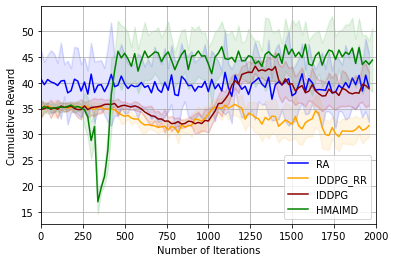

In [12]:
from File_Name import project_dir, data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def draw_every_results(cr_csv, ranges, max_num):
    colors = ['blue', 'royalblue', 'green', 'lightgreen', 'orange', 'wheat', 'darkred', 'red']
    df = pd.read_csv(cr_csv, names=["Epoch index", "ra", "iddpg_rr", "iddpg", "hmaimd"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    ra_rewards = df["ra"].values.tolist()
    iddpg_rr_rewards = df["iddpg_rr"].values.tolist()
    iddpg_rewards = df["iddpg"].values.tolist()
    hmaimd_rewards = df["hmaimd"].values.tolist()
    print(len(epoch_index))
    print(len(ra_rewards))
    print(len(iddpg_rr_rewards))
    print(len(iddpg_rewards))
    print(len(hmaimd_rewards))
    draw_one_result(epoch_index, ra_rewards, ranges, max_num, colors[0:2], line_label='RA')
    draw_one_result(epoch_index, iddpg_rr_rewards, ranges, max_num, colors[4:6], line_label='IDDPG_RR')
    draw_one_result(epoch_index, iddpg_rewards, ranges, max_num, colors[6:], line_label='IDDPG')
    draw_one_result(epoch_index, hmaimd_rewards, ranges, max_num, colors[2:4], line_label='HMAIMD')
    
    plt.xlim(xmin=0, xmax=2000)
    # plt.ylim(ymin=10, ymax=70)
    plt.xlabel("Number of Iterations")  # 横坐标名字
    plt.ylabel("Cumulative Reward")  # 纵坐标名字
    plt.legend(loc="best")  # 图例
    plt.grid()
    plt.savefig('cr_results.png', dpi=600, bbox_inches='tight')
    plt.show

def draw_one_result(epoch_index, rewards, ranges, max_num, colors, line_label):
    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    plt.plot(nex_x_vals, mean_results, color=colors[0], label=line_label)
    plt.plot(nex_x_vals, mean_plus_std, color=colors[1], alpha=0.1)
    plt.plot(nex_x_vals, mean_minus_std, color=colors[1], alpha=0.1)
    plt.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.1, color=colors[0])

def draw_all_Results(ra_csv, ddpg_csv, iddpg_csv, hmaimd_head, hmaimd_tail, ranges, max_num):
    colors = ['green', 'lightgreen', 'blue', 'royalblue', 'darkred', 'red', 'orange', 'wheat']

    draw_Results(hmaimd_head, hmaimd_tail, ranges, max_num, colors[0:2])
    draw_RA(iddpg_csv, ranges, max_num, colors[4:6], line_label='IDDPG')
    draw_RA(ddpg_csv, ranges, max_num, colors[6:], line_label='DDPG')
    draw_RA(ra_csv, ranges, max_num, colors[2:4], line_label='RA')
    
    plt.xlim(xmin=0, xmax=5000)
    # plt.ylim(ymin=10, ymax=70)
    plt.xlabel("Number of Iterations")  # 横坐标名字
    plt.ylabel("Cumulative Reward")  # 纵坐标名字
    plt.legend(loc="best")  # 图例
    plt.grid()
    plt.savefig('output.png', dpi=600, bbox_inches='tight')
    plt.show

def draw_Results(csv_head, csv_tail, ranges, max_num, colors):
    # correct_csv_name = project_dir + data + csv_name
    df_head = pd.read_csv(csv_head, names=["id", "Epoch index", "Total reward", "Time taken"], header=0)
    df_tail = pd.read_csv(csv_tail, names=["id", "Epoch index", "Total reward", "Time taken"], header=0)
    df_head = df_head[df_head["Epoch index"] <= 500]
    df_tail = df_tail[df_tail["Epoch index"] >= 501]
    # print(len(df_head))
    # print(len(df_tail))
    epoch_index = df_head["Epoch index"].values.tolist() + df_tail["Epoch index"].values.tolist()
    rewards = df_head["Total reward"].values.tolist() + df_tail["Total reward"].values.tolist()

    # print(len(epoch_index))
    # print(len(rewards))

    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    plt.plot(nex_x_vals, mean_results, color=colors[0], label='HMAIMD')
    plt.plot(nex_x_vals, mean_plus_std, color=colors[1], alpha=0.1)
    plt.plot(nex_x_vals, mean_minus_std, color=colors[1], alpha=0.1)
    plt.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.1, color=colors[0])
    # plt.plot(epoch_index, rewards, '-', color='b')  # s-:方形
    # plt.show()


def draw_RA(csv_name, ranges, max_num, colors, line_label):
    # correct_csv_name = project_dir + data + csv_name
    df = pd.read_csv(csv_name, names=["id", "Epoch index", "Total reward", "Time taken"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    rewards = df["Total reward"].values.tolist()

    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    plt.plot(nex_x_vals, mean_results, color=colors[0], label=line_label)
    plt.plot(nex_x_vals, mean_plus_std, color=colors[1], alpha=0.1)
    plt.plot(nex_x_vals, mean_minus_std, color=colors[1], alpha=0.1)
    plt.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.1, color=colors[0])
    # plt.plot(epoch_index, rewards, '-', color='b')  # s-:方形


def get_mean_and_standard_deviation_result(result, ranges, max_num):
    """From a list of lists of agent results it extracts the mean results and the mean results plus or minus
        some multiple of the standard deviation"""
    mean_results = []
    mean_minus_std = []
    mean_plus_std = []
    index = 0
    for i in range(int(max_num / ranges) - 1):
        result_at_a_range = result[index: index + ranges]
        index += ranges
        mean_result = np.mean(result_at_a_range)
        std_result = np.std(result_at_a_range)
        mean_results.append(mean_result)
        mean_minus_std.append(mean_result - std_result)
        mean_plus_std.append(mean_result + std_result)
    
    result_at_a_range = result[-ranges:]
    mean_result = np.mean(result_at_a_range)
    std_result = np.std(result_at_a_range)
    mean_results.append(mean_result)
    mean_minus_std.append(mean_result - std_result)
    mean_plus_std.append(mean_result + std_result)
    return mean_minus_std, mean_results, mean_plus_std


if __name__ == '__main__':


    # RA
    # ra_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-14-04-49-44-ra_result.csv'
    # # draw_RA(csv_name, 100, 5000)
    # # csv_name = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data_Copyed/2021-10-08-15-42-00/temple_result_8046c65d538b45f19d6b80da8cc49e9d.csv'
    # # csv_name = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-29-16-16-31/temple_result_278b767e83fc478886e0e4eb54a06fc9.csv'
    # # csv_name = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-14-04-49-44/temple_result_a48e92cc8d274d7e9ad23e1c54725392.csv'
    # # csv_name = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data_Copyed/2021-10-08-23-48-58/temple_result_89ae0d7a01b0408d9a3891c788354746.csv'
    # # csv_name = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-14-04-49-44-ddpg_result.csv'
    
    # csv_name = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-14-04-49-44-ddpg_result_1.csv'
    # # csv_name = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-14-04-49-44-ddpg_result.csv'
    # ddpg_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-14-04-49-44-ddpg_result_e6.csv'
    # # ddpg_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-09-14-04-49-44-ddpg_result.csv'
    # # IDDPG
    # iddpg_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-10-15-40-29/temple_result_f78f8f75d2c64f079c361bea4ccaf853.csv'
    # # HMAIMD
    # hmaimd_head = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-12-56-51/temple_result_5e9c9938ed1341fa983179c5fc26f00b.csv'
    # hmaimd_tail = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-23-20-34/temple_result_d1948991c173428985ff1263e3399317.csv'
    # hmaimd_tail = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data_Copyed/2021-10-08-15-42-00/temple_result_8046c65d538b45f19d6b80da8cc49e9d.csv'
    # draw_RA(csv_name, 50, 5000)
    cr_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/CR_result.csv"
    draw_every_results(cr_csv, 20, 2000)
    # draw_Results(csv_head, csv_tail, 100, 5000, ['green', 'lightgreen'])
    # draw_all_Results(ra_csv, ddpg_csv, iddpg_csv, hmaimd_head, hmaimd_tail, 100, 5000)